## Importing dependencies

In [30]:
import numpy as np          #   used to make arrays
import pandas as pd         #   used to make dataframes / structured tables for the data
import matplotlib.pyplot as plt         #   used to create plots
import seaborn as sns       #   used to create graphs
from sklearn.model_selection import train_test_split        #   used to split our data into training data and test data
from xgboost import XGBRegressor        #   provides the gradient boosting algorithm
from sklearn import metrics         #   used to evaluate our model
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Getting Data

### Quick look at dataset

In [31]:
EXERCISE_DATA_PATH = '/content/sample_data/exercise.csv'
CALORIES_DATA_PATH = '/content/sample_data/calories.csv'

In [32]:
def load_data(filepath):
    return pd.read_csv(filepath)

In [33]:
exercise_data = load_data(EXERCISE_DATA_PATH)
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [34]:
calories = load_data(CALORIES_DATA_PATH)
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


### Combining Data

In [35]:
#   data appended after last column
df = pd.concat([exercise_data, calories['Calories']], axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [36]:
df.shape

(15000, 9)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [38]:
# checking for missing values
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [39]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Histograms

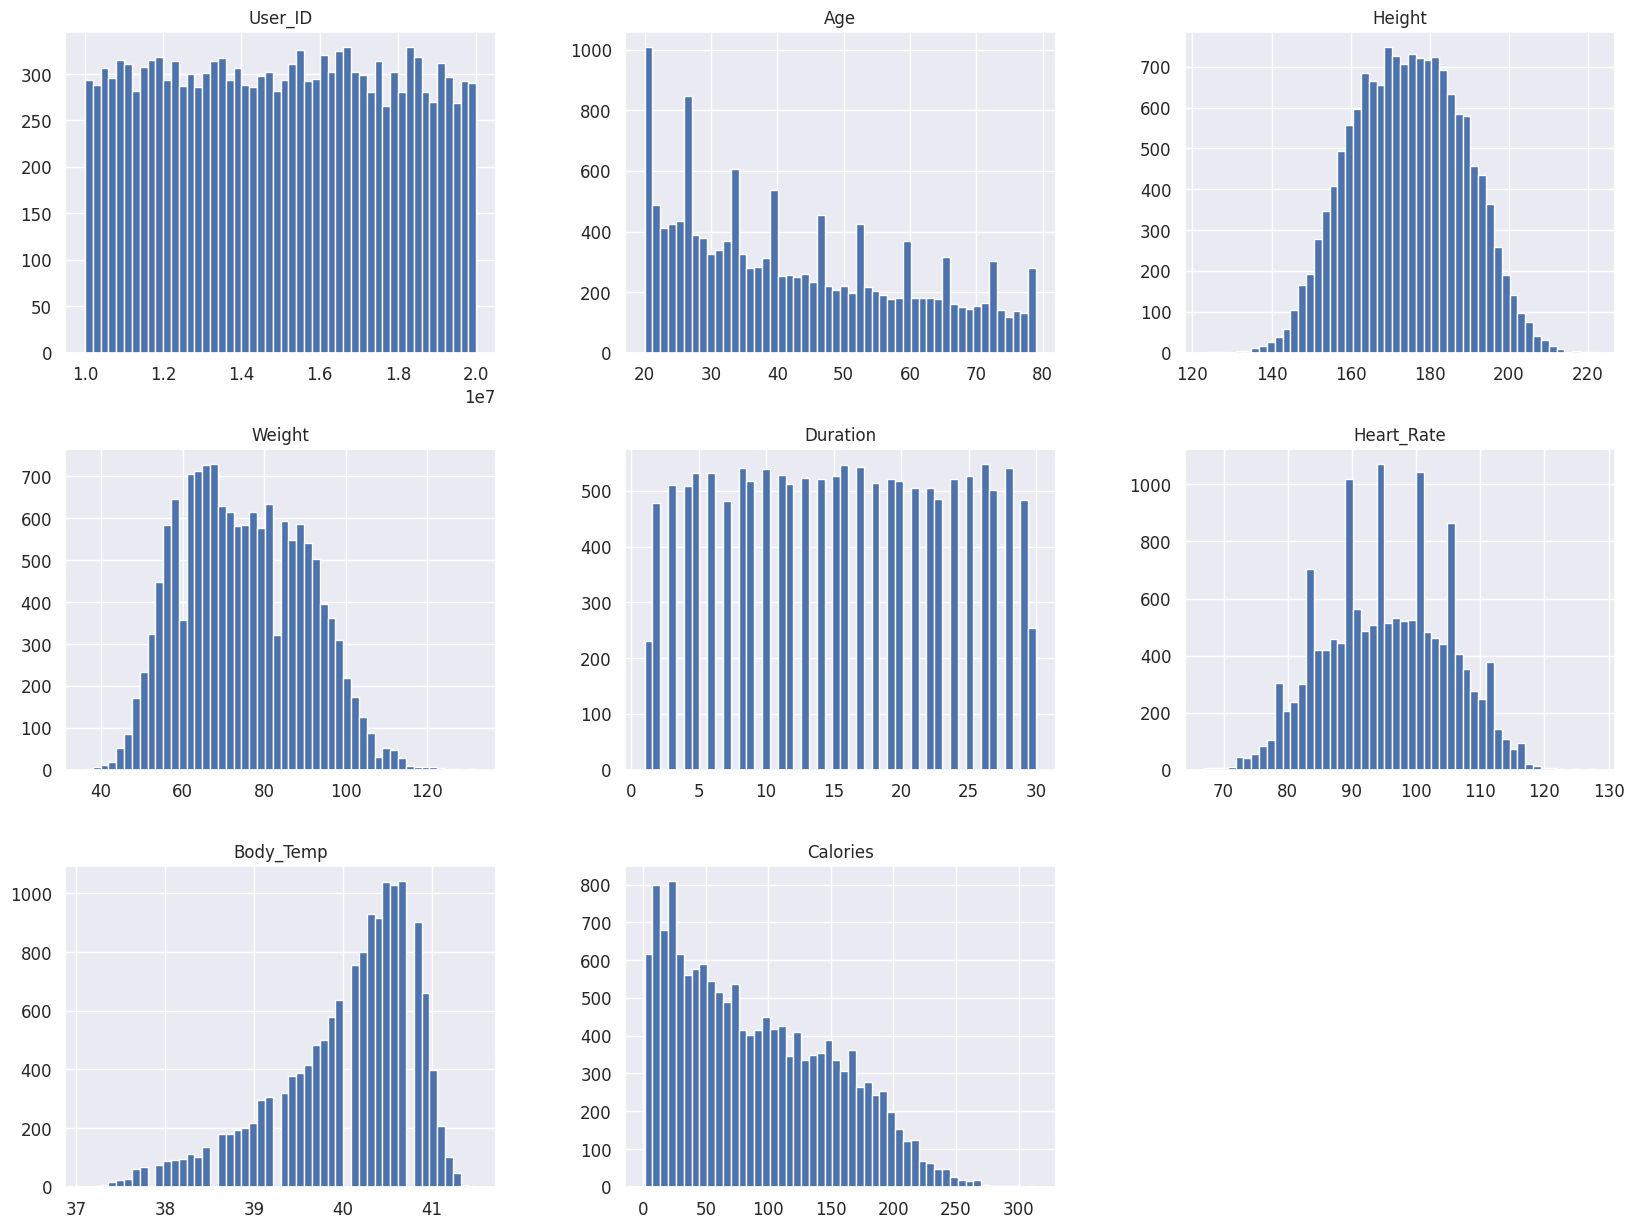

In [40]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Computing Correlation Matrix

In [42]:
# finding correlation of dataset
corr_matrix = df.corr(numeric_only = True)
print(corr_matrix)

             User_ID       Age    Height    Weight  Duration  Heart_Rate  \
User_ID     1.000000 -0.001827 -0.013520 -0.011603 -0.002751   -0.000457   
Age        -0.001827  1.000000  0.009554  0.090094  0.013247    0.010482   
Height     -0.013520  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight     -0.011603  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration   -0.002751  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate -0.000457  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp   0.000923  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories   -0.001661  0.154395  0.017537  0.035481  0.955421    0.897882   

            Body_Temp  Calories  
User_ID      0.000923 -0.001661  
Age          0.013175  0.154395  
Height       0.001200  0.017537  
Weight       0.004095  0.035481  
Duration     0.903167  0.955421  
Heart_Rate   0.771529  0.897882  
Body_Temp    1.000000  0.824558  
Calories     0.824558  1.000000  


In [43]:
corr_matrix['Calories'].sort_values(ascending=False)

Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Height        0.017537
User_ID      -0.001661
Name: Calories, dtype: float64

Duration of exercise seems to have a strong, positive correlation with calories burned. We look at this feature specifically:

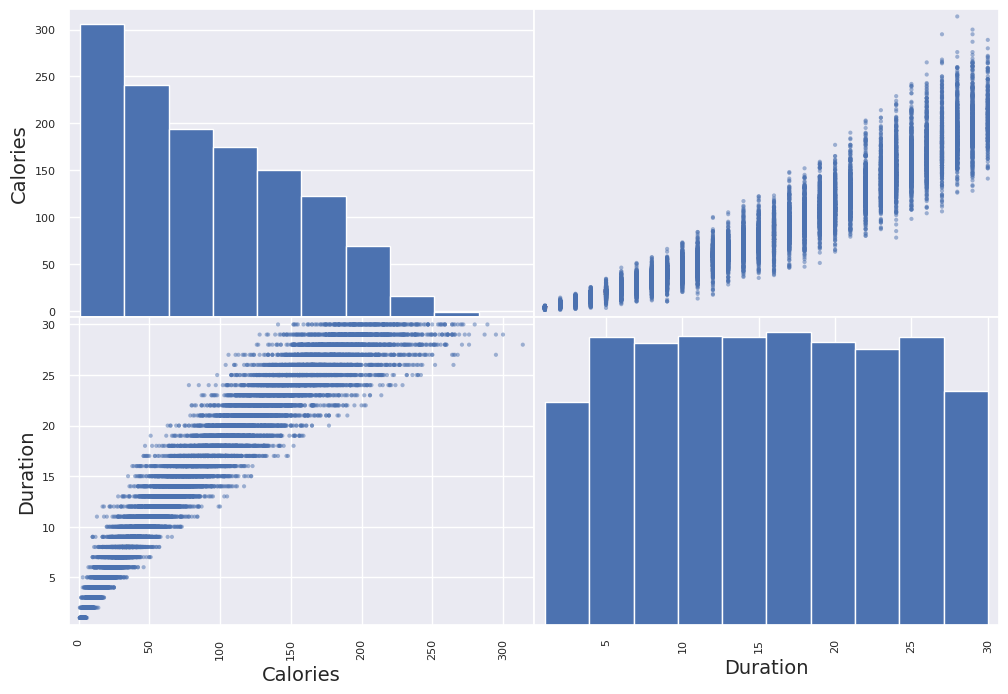

In [45]:
from pandas.plotting import scatter_matrix

attributes = ["Calories", "Duration"]
scatter_matrix(df[attributes], figsize=(12, 8));

## Creating Test Data

Using 20% of data for testing and the rest for training. We use Gender to create a stratified split.

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Gender"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [47]:
strat_test_set["Gender"].value_counts()/len(strat_test_set)

female    0.503667
male      0.496333
Name: Gender, dtype: float64

In [48]:
df["Gender"].value_counts()/len(df)

female    0.503533
male      0.496467
Name: Gender, dtype: float64

In [49]:
strat_test_set.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
7259,19651395,female,68,168.0,62.0,3.0,85.0,38.7,14.0
2563,11343832,male,38,181.0,88.0,19.0,100.0,40.7,107.0
5748,15331150,female,37,166.0,65.0,25.0,101.0,40.7,142.0
5816,11965928,male,20,185.0,91.0,17.0,96.0,40.3,72.0
6456,10253739,female,20,177.0,66.0,8.0,83.0,39.7,28.0


###   Preparing Data for ML algorithms


In [67]:
attrs = df.drop(columns=['User_ID', 'Calories'], axis=1)
attrs_labels = strat_train_set[['User_ID', 'Calories']].copy()

In [68]:
# verify the columns were dropped successfully
attrs.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8


In [69]:
attrs_labels.head()

,User_ID,Calories
4822,17407051,54.0
9045,13546565,148.0
14504,10824389,34.0
4083,16826583,190.0
11977,12840383,48.0


### Data Cleaning

In [70]:
# checking for any empty values
sample_incomplete_rows = attrs[attrs.isnull().any(axis=1)].head()
sample_incomplete_rows

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp


In [71]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [72]:
attrs_num = attrs.drop(columns=["Gender"], axis=1)

In [73]:
imputer.fit(attrs_num)

SimpleImputer(strategy='median')

In [74]:
imputer.statistics_

array([ 39. , 175. ,  74. ,  16. ,  96. ,  40.2])

In [75]:
X = imputer.transform(attrs_num)

In [76]:
attrs_tr = pd.DataFrame(X,columns=attrs_num.columns, index=attrs_num.index)

In [77]:
attrs_tr.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


### Handling text data

In [20]:
# Converting STR to NUM type (machine cannot interpret str)
calories_data.replace(
    {'Gender':
     {'male':0,
      'female':1
      }
    },
    inplace=True)

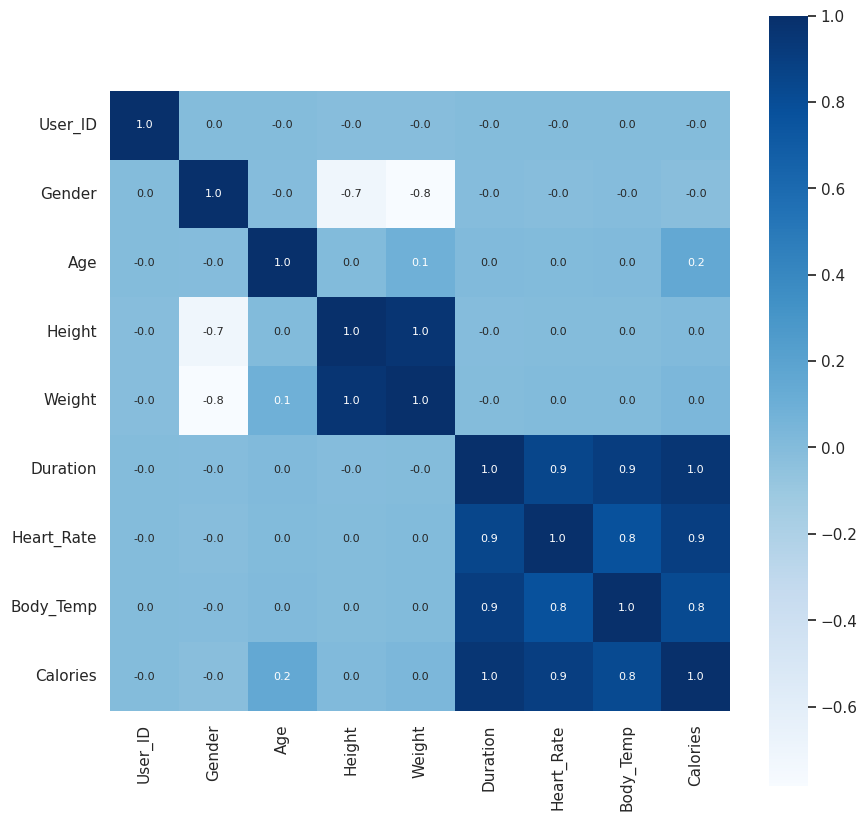

In [22]:
#   constructing a heatmap to interpret correlation

plt.figure(figsize=(10,10))
sns.heatmap(
    correlation,
    cbar=True,
    square=True,
    fmt='.1f',
    annot=True,
    annot_kws={'size':8},
    cmap='Blues'
    )
plt.show()

In [24]:
#   store this specific column
y = calories_data['Calories']
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


###     Splitting data into TRAINING and TEST sets

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)
print(f" X_column:   {x.shape}\n X_train:    {x_train.shape}\n X_test:     {x_test.shape}")

 X_column:   (15000, 7)
 X_train:    (12000, 7)
 X_test:     (3000, 7)


## Model Training

In [26]:
#   loading model
model = XGBRegressor()

#   training model with x_train
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Model Evaluation

In [27]:
#   prediction on test data
test_data_prediction = model.predict(x_test)
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [28]:
#   mean absolute error
mae = metrics.mean_absolute_error(y_test, test_data_prediction)
print(f"Mean Absolute Error = {mae}")

Mean Absolute Error = 1.4833678883314132
